# Final Gantt for _[The Necessity of an Additional $\gamma$-ray Transient Monitoring Mission](https://www.overleaf.com/project/67c600eae72c06e070b972df)_
Prelimiary plots as well as learning to make Gantt charts and searching the correct data (i.e. getting to know all $\gamma$-ray and X-ray mission in the last 30 years) can be found in another notebook named `GanttObservatories.ipynb`.

## Time-Energy Gantt Diagram

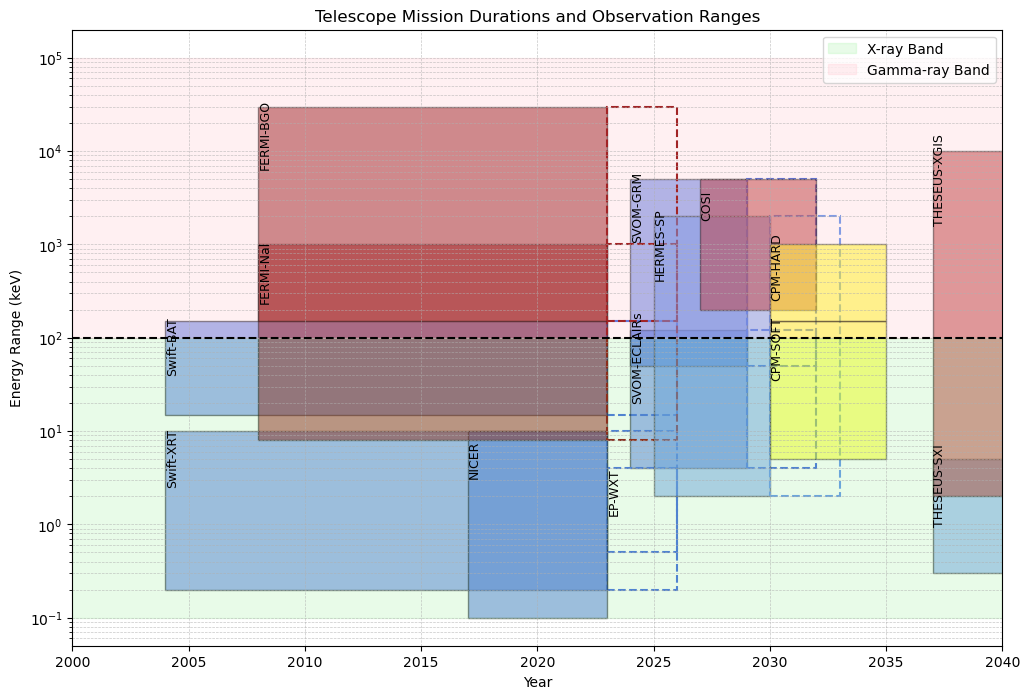

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define telescope data (including possible extensions)
telescopes = [
    ('Swift-BAT', (15, 150), 2004, 'y', 'current_xray', 'source'),
    ('Swift-XRT', (0.2, 10), 2004, 'y', 'current_xray', 'source'),
    ('SVOM-ECLAIRs', (4, 120), 2024, 'y', 'current_xray', 'source'),
    ('SVOM-GRM', (50, 5000), 2024, 'y', 'current_xray', 'source'),
    ('EP-WXT', (0.5, 4), 2023, 'y', 'current_xray', 'source'),
    ('NICER', (0.1, 10), 2017, 'n', 'current_xray', 'Description NICER website'),
    
    ('FERMI-Nal', (8, 1000), 2008, 'y', 'current_gamma', 'source'),
    ('FERMI-BGO', (150, 30000), 2008, 'y', 'current_gamma', 'source'),
    
    
    ('THESEUS-SXI', (0.3, 5), 2037, 'n', 'future_xray', 'source'),
    ('HERMES-SP', (2, 2000), 2025, 'y', 'future_xray', 'Evangelista et al.'),
    
    ('THESEUS-XGIS', (2, 10000), 2037, 'n', 'future_gamma', 'source'),
    ('COSI', (200, 5000), 2027, 'n', 'future_gamma', 'source'),
    
    ('CPM-SOFT', (5, 150), 2030, 'n', 'capiph', 'alcaide-núñez 2025 inprep'),
    ('CPM-HARD', (150, 1000), 2030, 'n', 'capiph', 'alcaide-núñez 2025 inprep'),
]

# Define current year
current_year = 2023

# Extract data
names = [t[0] for t in telescopes]
ranges = [t[1] for t in telescopes]
launch_years = [t[2] for t in telescopes]
extensions = [t[3] for t in telescopes]
obstypes = [t[4] for t in telescopes]

# Compute mission durations
lifetimes = []
for year in launch_years:
    if year <= current_year:
        lifetimes.append(current_year - year)
    else:
        lifetimes.append(5)  # Assume default 5-year lifetime for future missions

# Compute end-of-mission years
end_years = [launch + lifetime for launch, lifetime in zip(launch_years, lifetimes)]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors
colors = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "capiph": "yellow"
}

# Plot mission lifetimes as rectangles
for i in range(len(telescopes)):
    name = names[i]
    start, end = ranges[i]
    launch = launch_years[i]
    end_mission = end_years[i]
    ext = extensions[i]
    obstype = obstypes[i]

    color = colors[obstype]
    width = end_mission - launch
    height = end - start

    # Main mission rectangle
    rect = patches.Rectangle((launch, start), width, height,
                             facecolor=color, alpha=0.5, edgecolor="black", linewidth=1)
    ax.add_patch(rect)

    # Mission extension
    if ext == 'y':
        ext_length = 3
        ext_rect = patches.Rectangle((end_mission, start), ext_length, height,
                                     facecolor='none', edgecolor=color, linestyle='--', linewidth=1.5)
        ax.add_patch(ext_rect)

    # Centered label
    ax.text(launch+0.3, start + height / 2, name, ha="center", va="center", fontsize=9, color="black", rotation='vertical')

# Set axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Energy Range (keV)")
ax.set_title("Telescope Mission Durations and Observation Ranges")

# Log scale for energy
ax.set_yscale("log")

# Highlight X-ray and gamma-ray energy bands
ax.axhline(y=100, color='black', linestyle='--')
ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2, label="X-ray Band")
ax.axhspan(ymin=100, ymax=10**5, color='lightpink', alpha=0.2, label="Gamma-ray Band")

# Set x-axis range
ax.set_xlim(2000, 2040)

# Enable grid
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Optional: Add legend for bands
ax.legend(loc='upper right')

# Save and show
fig.savefig('time_energy.png', dpi=600)
plt.show()

The CAPIBARA Photonic Mission (CAPIPH) will cover two contiguous energy ranges, crucial for GRBs research as well as further high-energy transient explosions (magnetar bursts, X-ray transients, ...). These comprise:
$5\ \text{keV}$ - $150\ \text{keV}$ and $150\ \text{keV}$ - $1\ \text{MeV}$. The selection of these energy ranges for the observations of CAPIPH was decided under the consideration of both the scientific uses and significance of the collected data as well as the current state and future expectations for the high-energy astrophysics field in terms of observations and observational gaps. The goal of CAPIPH is to provide high-quality and reliable $\gamma$-ray and X-ray transient observations by monitoring the sky in the mentioned energy ranges using CubeSat technology.

Until 2025 we did have:
* Swift
* Fermi
* INTEGRAL

However, INTEGRAL was shut down in March 2025, and both FERMI and Swift will face both aging and financial issues, continued observations are not granted. In the context of this panorama, space agencies are preparing future missions, these are:
* COSI
* THESEUS
* HERD

And some that were launched recently:
* SVOM
* Einstein Probe
* HERMES

The aim of CAPIBARA is to provide a further GRB monitoring satellite for the sake of intensity interferometry. Complying with this goal we are setting a dual observation range, where we will be covering both gamma-rays and X-rays and supporting the efforts of other teams and missions. Our proposed observation range is:
1. Hard: $1\ \text{keV - } 150\ \text{keV}$
2. Soft: $150\ \text{keV - } 1\ \text{MeV}$

Strategically, the goal of CPM (CAPIBARA Photonic Mission) is to fill in the observation gap between the HERD and the COSI missions, replacing the monitoring of FERMI and INTEGRAL. While also matching the observations of COSI with those of SVOM, HiZ-GUNDAM and Einstein Probe.

CPM comes accross as the observational stage between HERMES (a short CubeSat mission) and THESEUS (a mid-size mission by ESA in the 2030s). **But how special is CPM? How does it justify with the existance of HERMES?** With THESEUS is easier, because it is more far in the timeline.

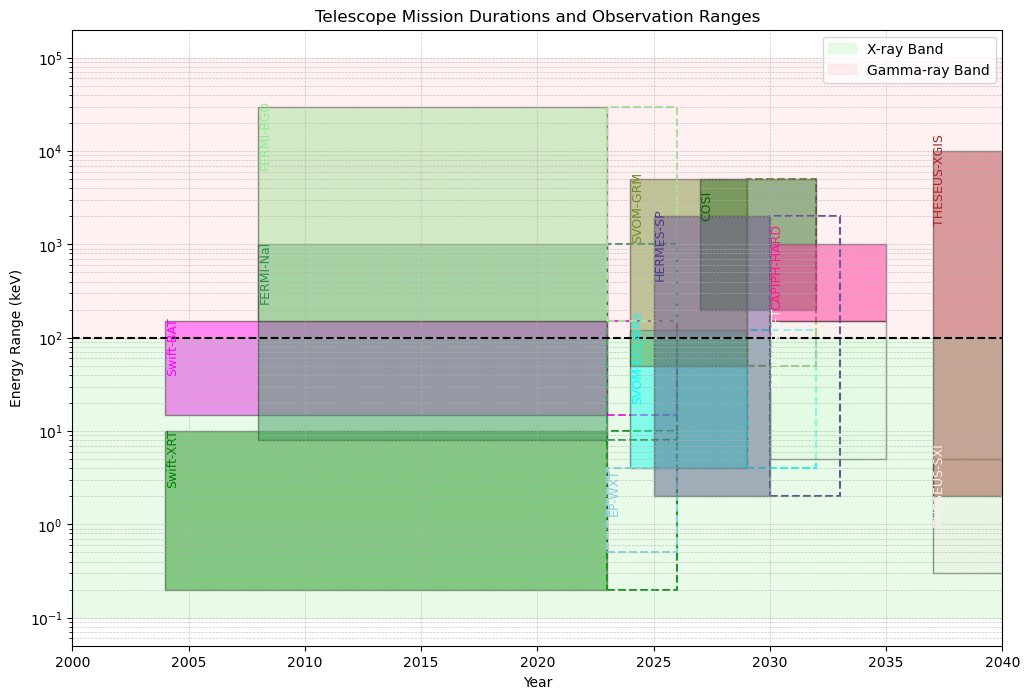

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

mcol = list(mcolors.CSS4_COLORS.keys())

# Define telescope data (including possible extensions)
telescopes = [
    ('Swift-BAT', (15, 150), 2004, 'y', 'current_xray', 'source'),
    ('Swift-XRT', (0.2, 10), 2004, 'y', 'current_xray', 'source'),
    ('SVOM-ECLAIRs', (4, 120), 2024, 'y', 'current_xray', 'source'),
    ('SVOM-GRM', (50, 5000), 2024, 'y', 'current_xray', 'source'),
    ('EP-WXT', (0.5, 4), 2023, 'y', 'current_xray', 'source'),
    ('FERMI-Nal', (8, 1000), 2008, 'y', 'current_gamma', 'source'),
    ('FERMI-BGO', (150, 30000), 2008, 'y', 'current_gamma', 'source'),
    ('COSI', (200, 5000), 2027, 'n', 'future_gamma', 'source'),
    ('THESEUS-SXI', (0.3, 5), 2037, 'n', 'future_gamma', 'source'),
    ('THESEUS-XGIS', (2, 10000), 2037, 'n', 'future_gamma', 'source'),
    ('CAPIPH-SOFT', (5, 150), 2030, 'n', 'capiph', 'alcaide-núñez 2025 inprep'),
    ('CAPIPH-HARD', (150, 1000), 2030, 'n', 'capiph', 'alcaide-núñez 2025 inprep'),
    ('HERMES-SP', (2, 2000), 2025, 'y', 'capiph', 'Evangelista et al.'),
]

# Define current year
current_year = 2023

# Extract data
names = [t[0] for t in telescopes]
ranges = [t[1] for t in telescopes]
launch_years = [t[2] for t in telescopes]
extensions = [t[3] for t in telescopes]
obstypes = [t[4] for t in telescopes]

# Compute mission durations
lifetimes = []
for year in launch_years:
    if year <= current_year:
        lifetimes.append(current_year - year)
    else:
        lifetimes.append(5)  # Assume default 5-year lifetime for future missions

# Compute end-of-mission years
end_years = [launch + lifetime for launch, lifetime in zip(launch_years, lifetimes)]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors
colors = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "capiph": "yellow"
}

# Plot mission lifetimes as rectangles
for i in range(len(telescopes)):
    name = names[i]
    start, end = ranges[i]
    launch = launch_years[i]
    end_mission = end_years[i]
    ext = extensions[i]
    obstype = obstypes[i]

    from random import randint
    color = mcol[randint(0, 147)]
    text_color = color # "black"
    width = end_mission - launch
    height = end - start

    # Main mission rectangle
    rect = patches.Rectangle((launch, start), width, height,
                             facecolor=color, alpha=0.5, edgecolor="black", linewidth=1)
    ax.add_patch(rect)

    # Mission extension
    if ext == 'y':
        ext_length = 3
        ext_rect = patches.Rectangle((end_mission, start), ext_length, height,
                                     facecolor='none', edgecolor=color, linestyle='--', linewidth=1.5)
        ax.add_patch(ext_rect)

    # Centered label
    ax.text(launch+0.3, start + height / 2, name, ha="center", va="center", fontsize=9, color=text_color, rotation='vertical')

# Set axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Energy Range (keV)")
ax.set_title("Telescope Mission Durations and Observation Ranges")

# Log scale for energy
ax.set_yscale("log")

# Highlight X-ray and gamma-ray energy bands
ax.axhline(y=100, color='black', linestyle='--')
ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2, label="X-ray Band")
ax.axhspan(ymin=100, ymax=10**5, color='lightpink', alpha=0.2, label="Gamma-ray Band")

# Set x-axis range
ax.set_xlim(2000, 2040)

# Enable grid
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Optional: Add legend for bands
ax.legend(loc='upper right')

# Save and show
fig.savefig('time_energy.png', dpi=600)
plt.show()